In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_label),(test_images,test_labels)=mnist.load_data()

# 维度调整
train_images = np.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
test_images = np.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))

In [3]:
def get_train(size):
    # 随机生成index
    index = np.random.randint(0,train_images.shape[0],size)
    # 选择图像并进行resize
    resized_image = tf.image.resize_with_pad(train_images[index],227,227)
    return resized_image.numpy(),train_label[index]

# 对测试数据进行抽样
def get_test(size):
    # 随机生成index
    index = np.random.randint(0,test_images.shape[0],size)
    # 选择图像并进行resize
    resized_image = tf.image.resize_with_pad(test_images[index],227,227)
    return resized_image.numpy(),test_labels[index]

In [4]:
# 抽样结果
train_images,train_label = get_train(256)
test_images,test_labels = get_test(128)

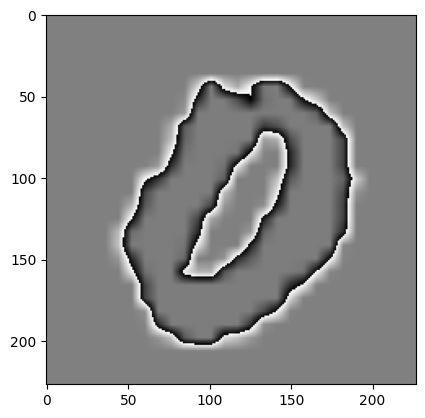

In [5]:
plt.imshow(train_images[4].astype(np.int8).squeeze(),cmap='gray')

In [6]:
net = tf.keras.models.Sequential([
    # 卷积层：96 11*11 4 relu
    tf.keras.layers.Conv2D(filters=96, kernel_size=11,
                           strides=4, activation="relu"),
    # 池化：3*3 2
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    # 卷积：256 5*5 1 RELU same
    tf.keras.layers.Conv2D(filters=256, kernel_size=5,
                           padding="same", activation="relu"),
    # 池化： 3*3 2
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    

    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    # output
    tf.keras.layers.Dense(10, activation="softmax")

])

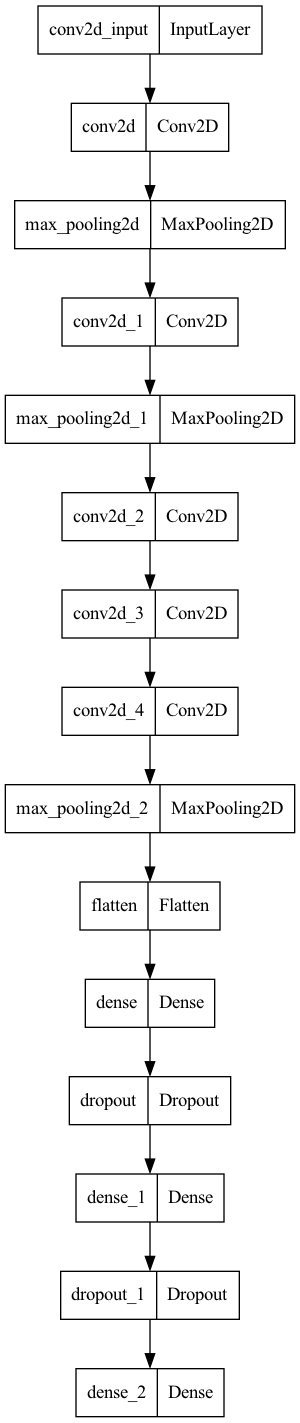

In [7]:
X = tf.random.uniform((1,227,227,1))
y = net(X)
tf.keras.utils.plot_model(net)

In [8]:
# 优化器,损失函数,评价指标
net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss=tf.keras.losses.sparse_categorical_crossentropy
           ,metrics=['accuracy'])

net.fit(train_images,train_label,batch_size=128,epochs=3,validation_split=0.1,verbose=1)

loss,accuracy = net.evaluate(test_images,test_labels,verbose=1)
print("损失值",loss)
print("准确率", accuracy)

Epoch 1/3


2023-04-11 20:12:04.723871: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 5s 2s/step - loss: 50.5917 - accuracy: 0.1000 - val_loss: 303.0266 - val_accuracy: 0.0385
Epoch 2/3
2/2 [==============================] - 4s 2s/step - loss: 97215.8438 - accuracy: 0.0696 - val_loss: 2116907641602048.0000 - val_accuracy: 0.1154
Epoch 3/3
4/4 [==============================] - 1s 141ms/step - loss: nan - accuracy: 0.1250
损失值 nan
准确率 0.125
